In [10]:
import torch
import numpy as np
import math
from matplotlib import pyplot as plt

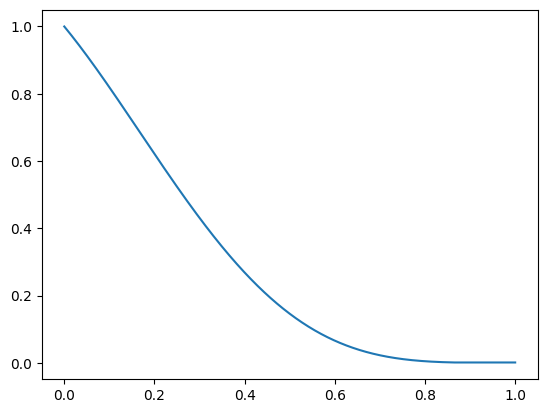

In [46]:
lnsp = np.linspace(0, 1, 1000)
def cosine_schedule(t, start=0.2, end=1, tau=2, clip_min=1e-3):
    # A gamma function based on cosine function.
    v_start = math.cos(start * math.pi / 2) ** (2 * tau)
    v_end = math.cos(end * math.pi / 2) ** (2 * tau)
    output = math.cos((t * (end - start) + start) * math.pi / 2) ** (2 * tau)
    output = (v_end - output) / (v_end - v_start)
    return np.clip(output, clip_min, 1.)

plt.plot(lnsp, np.vectorize(cosine_schedule)(lnsp))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


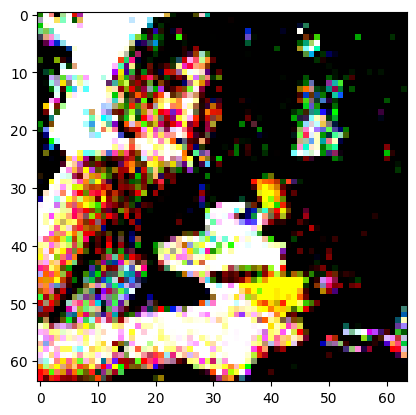

In [523]:
from training.noise import NoiseScheduler
import numpy as np

ns = NoiseScheduler(0.5, 100)
from PIL import Image

p = torch.tensor(np.array(Image.open('data/food_data/train/baby_back_ribs/16366.jpg').convert("RGB"))).float()
mean = p.mean()
std = p.std()
pn = ns((p - mean) / std, 16)
plt.imshow(pn.numpy())